In [36]:
import tensorflow as tf
import keras
import PIL.Image as pil
import pathlib

# Loading data (fruits 360)

Datasets: 
- Fruits 360: https://www.kaggle.com/datasets/moltean/fruits
- Fruit Classification: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition 

In [37]:
# Counting images and setting up path

training_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Training/')
test_dir = pathlib.Path('./fruits-360/fruits-360_dataset/fruits-360/Validation/')
train_count = len(list(training_dir.glob('*/*.jpg')))
test_count = len(list(test_dir.glob('*/*.jpg')))



print("Number of training images:", train_count)
print("Number of training images:", test_count)

Number of training images: 35133
Number of training images: 11804


In [38]:
batch_size = 50
img_height = 299
img_width = 299

# Loading training data

train_ds = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  seed=12344,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Loading test data

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=12344,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(len(train_ds))

Found 35133 files belonging to 70 classes.
Found 11804 files belonging to 70 classes.
703


In [39]:
# Get class names

class_names = train_ds.class_names
num_classes = len(class_names)
class_names[:5]

['Apple Braeburn',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith']

## Previewing Images

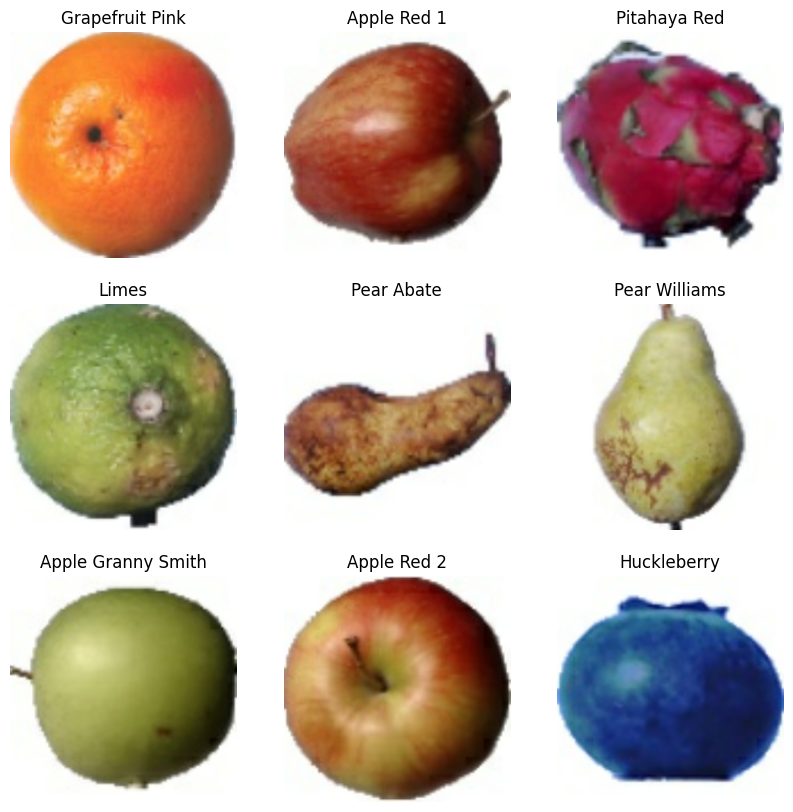

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Preprocessing

In [41]:
# Converting color values from 0-255 to 0-1

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [42]:
# Configuring dataset for performance
"""
Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. 
This will ensure the dataset does not become a bottleneck while training your model. 
If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

Dataset.prefetch overlaps data preprocessing and model execution while training.
"""

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Tranining baseline model

In [43]:
model = tf.keras.applications.inception_v3.InceptionV3()

In [44]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [46]:
model.fit(
  train_ds,
#   validation_data=val_ds,
  epochs=1
)

703/703 [==============================] - 4530s 6s/step - loss: 0.0438 - accuracy: 0.9854


In [47]:
model.evaluate(test_ds)


237/237 [==============================] - 277s 1s/step - loss: 2.1667 - accuracy: 0.5437


[2.1666667461395264, 0.5437139868736267]

In [48]:
model.evaluate(train_ds)

703/703 [==============================] - 836s 1s/step - loss: 2.2945 - accuracy: 0.5658


[2.2944934368133545, 0.565849781036377]

# Plot Loss

In [60]:
model.history
print(model.history.history)

{}


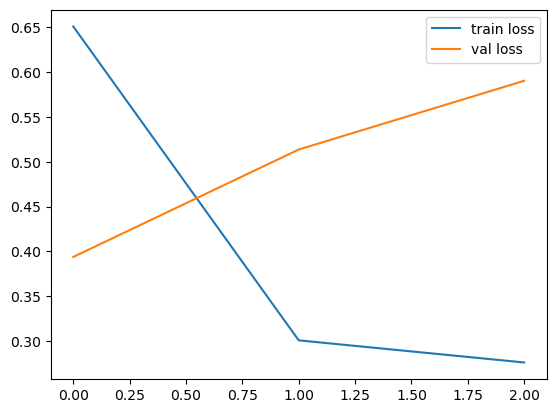

In [ ]:
# loss
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='test loss')
plt.legend()

# Plot Accuracy

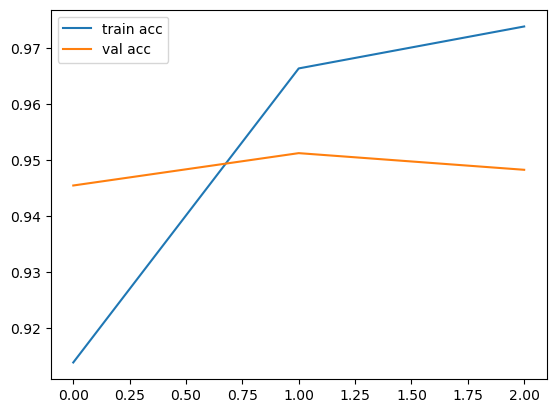

In [ ]:
# accuracies
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='test acc')
plt.legend()

In [ ]:
print("Train Result Accuracy, Loss and Accuracy:",model.evaluate(train_ds))
print("Test Accuracy, Loss and Accuracy:",model.evaluate(test_ds))

275/275 [==============================] - 449s 2s/step - loss: 0.2673 - accuracy: 0.9761
Train Result Accuracy, Loss and Accuracy: [0.26725998520851135, 0.9760624170303345]
93/93 [==============================] - 144s 2s/step - loss: 0.5889 - accuracy: 0.9484
Test Accuracy, Loss and Accuracy: [0.5889386534690857, 0.9484072923660278]


# Confusion Matrix (To Do)